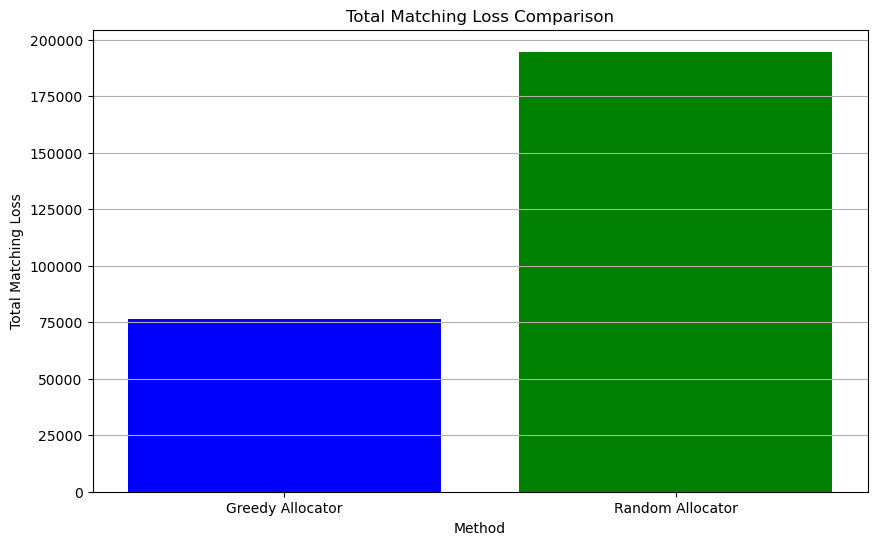

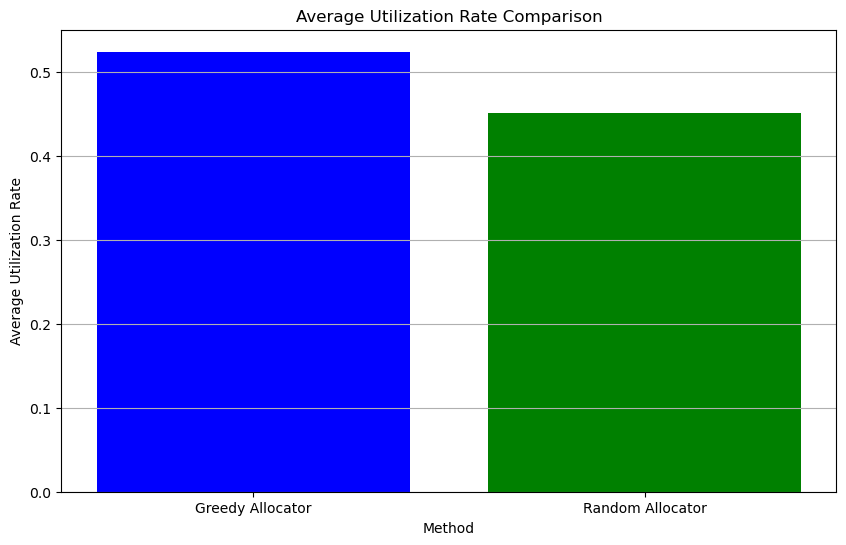

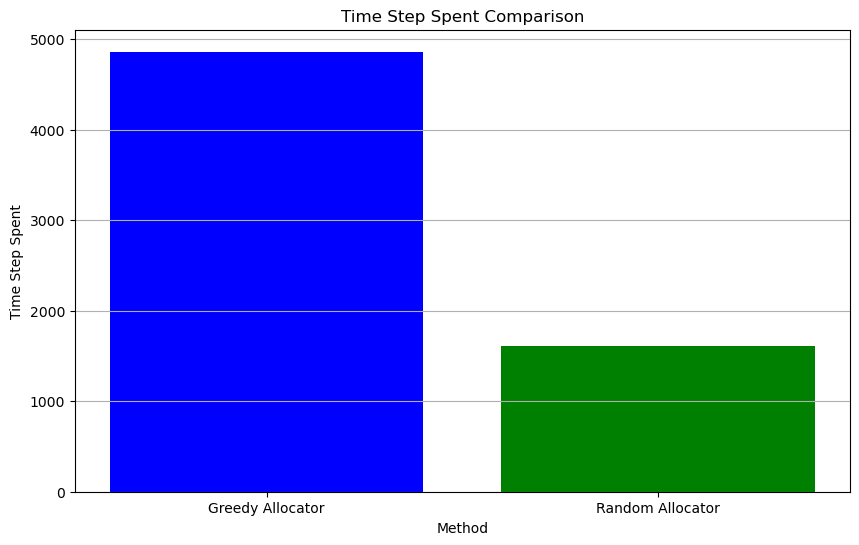

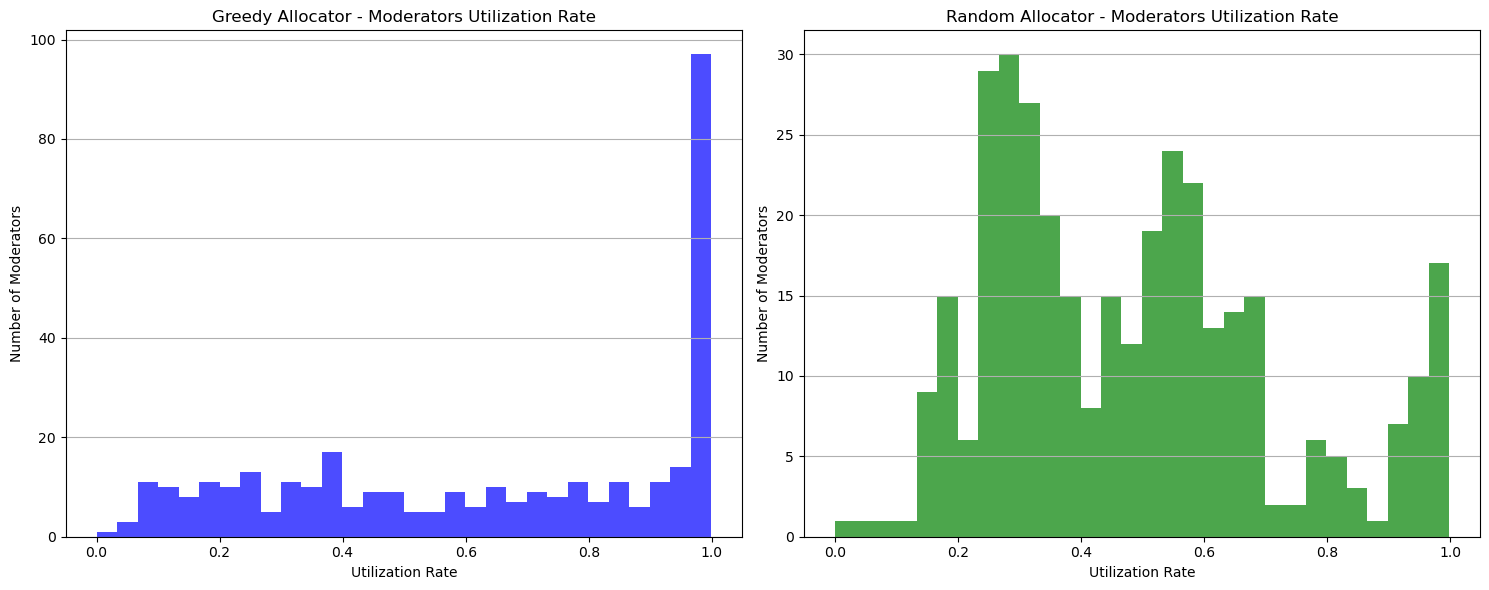

In [3]:
import json
import matplotlib.pyplot as plt

# Load the data from the JSON files
def load_data(filepath):
    with open(filepath, "r") as file:
        return json.load(file)

greedy_data = load_data('./simulation_results/greedy_allocator.json')
random_data = load_data('./simulation_results/random_allocator.json')
methods = ['Greedy Allocator', 'Random Allocator']

# Plotting the total matching loss for both methods
def plot_matching_loss(greedy_loss, random_loss):
    plt.figure(figsize=(10, 6))
    methods = ['Greedy Allocator', 'Random Allocator']
    losses = [greedy_loss, random_loss]
    plt.bar(methods, losses, color=['blue', 'green'])
    plt.title('Total Matching Loss Comparison')
    plt.ylabel('Total Matching Loss')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

plot_matching_loss(greedy_data[0], random_data[0])

# Plotting the average utilization rate for both methods
def plot_avg_utilization(greedy_avg_utilization, random_avg_utilization):
    plt.figure(figsize=(10, 6))
    avg_utilizations = [greedy_avg_utilization, random_avg_utilization]
    plt.bar(methods, avg_utilizations, color=['blue', 'green'])
    plt.title('Average Utilization Rate Comparison')
    plt.ylabel('Average Utilization Rate')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

plot_avg_utilization(greedy_data[1], random_data[1])

# Plotting the time step spent for both methods
def plot_time_step(greedy_time_step, random_time_step):
    plt.figure(figsize=(10, 6))
    time_steps = [greedy_time_step, random_time_step]
    plt.bar(methods, time_steps, color=['blue', 'green'])
    plt.title('Time Step Spent Comparison')
    plt.ylabel('Time Step Spent')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

plot_time_step(greedy_data[2], random_data[2])

# Plotting histograms of the utilization rates for all moderators for both methods
def plot_moderators_utilization(greedy_moderators_utilization, random_moderators_utilization):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.hist(greedy_moderators_utilization, bins=30, color='blue', alpha=0.7)
    plt.title('Greedy Allocator - Moderators Utilization Rate')
    plt.xlabel('Utilization Rate')
    plt.ylabel('Number of Moderators')
    plt.grid(axis='y')
    plt.subplot(1, 2, 2)
    plt.hist(random_moderators_utilization, bins=30, color='green', alpha=0.7)
    plt.title('Random Allocator - Moderators Utilization Rate')
    plt.xlabel('Utilization Rate')
    plt.ylabel('Number of Moderators')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_moderators_utilization(greedy_data[3], random_data[3])
